### [이미지 변형 - ROI]
- ROI : 관심영역
    - 이미지 전체가 아닌 일부 관심되는 부분만 지정하는 것
    - 방법
        + numpy slicing : img[y:y+h, x:x+w]
        + cv2 함수 : cv2.selectROI()/cv2.selectROIs()

- **주의 : opencv의 채널 순서가 BGR로 일반 이미지 순서와 다름**


[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
# 모듈 로딩
import numpy as np
import cv2
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 파일
FILE_NAME = '../Data/Image/flower.jpg'

In [2]:
## 데이터 로딩 및 기본 정보 출력
img = cv2.imread(FILE_NAME)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f'로딩 Image 정보: {imgRGB.shape}') if imgRGB is not None else print("이미지 없음")

로딩 Image 정보: (321, 380, 3)


[2] 이미지 자르기 - ROI[기본] <hr>

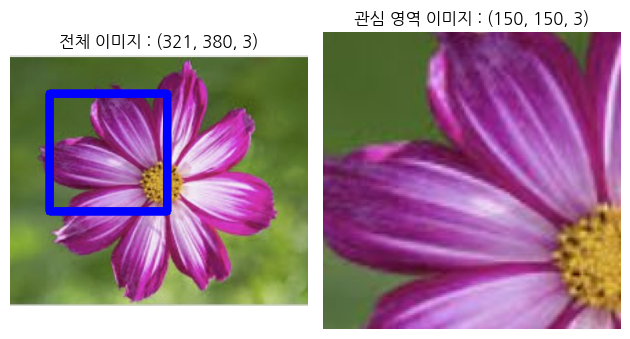

In [3]:
# ====================================================
# [2-1] 영역 설정
# ====================================================
# 좌표 설정
x, y, w, h = 50, 50, 150, 150

# ROI 영역 설정 및 저장
imgROI = imgRGB[y:y+h, x:x+w].copy()

# ====================================================
# [2-2] 이미지에 표시
# ====================================================
cv2.rectangle(imgRGB, (x, y), (x+w, y+h), (0, 0, 255), 10)

# ====================================================
# [2-3] 이미지 시각화
# ====================================================
fig, axes = plt.subplots(1, 2)

titles = ['전체 이미지', '관심 영역 이미지']
images = [imgRGB, imgROI]

for ax, title, img in zip(axes, titles, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'{title} : {img.shape}')
    ax.set_axis_off()

plt.tight_layout()
plt.show()

[3] 이미지 자르기 - 가운데 자르기 <hr>

In [4]:
# ==================================================================
# [3-1] 현재 이미지 원본 크기 정보
# ==================================================================
# 데이터 로딩 및 기본 정보 출력
img = cv2.imread(FILE_NAME)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W = imgRGB.shape[:2]

# ==================================================================
# [3-2] 가운데 이미지 자르기
# ==================================================================
crop_size = 80                              # 원한는 크기(정사각형)
center_x, center_y = W//2, H//2             # 가운데 위치 계산
x1 = center_x - crop_size//2                # ROI 영역 지정
y1 = center_y - crop_size//2
x2 = center_x + crop_size//2
y2 = center_y + crop_size//2
print(f'center= ({center_x}, {center_y}, p1 = ({x1}, {y1}, p2 = ({x2}, {y2})')

cropped = imgRGB[y1:y2, x1:x2].copy()       # 가운데 중심에서 자르기

center= (190, 160, p1 = (150, 120, p2 = (230, 200)


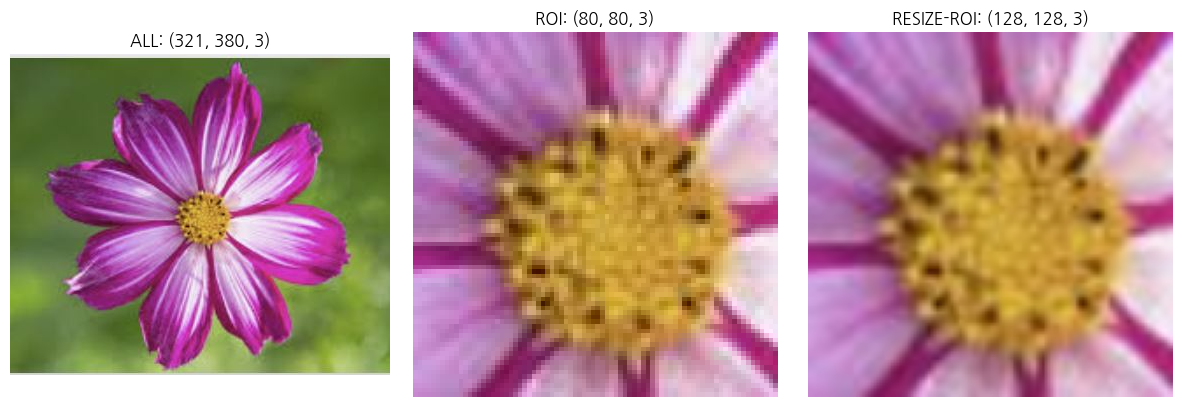

In [5]:
# ==================================================================
# [3-3] 크롭 후 리사이징
# -> 픽셀은 많아졌지만 "새 정보가 생긴 건 아님" (부드럽게 늘어난 느낌)
# imshow() : 이미지를 축 크기에 맞게 / 칸 크기에서 맞게
#            자동으로 확대/축소해서 출력
# ==================================================================
resized = cv2.resize(cropped, (128, 128), interpolation=cv2.INTER_LINEAR)

# 이미지 시각화
_, axes = plt.subplots(1, 3, figsize=(12, 4))
img_data = [imgRGB, cropped, resized]
titles = ["ALL", "ROI", "RESIZE-ROI"]

for ax, data, title in zip(axes, img_data, titles): 
    ax.imshow(data)
    ax.set_title(f'{title}: {data.shape}')
    ax.axis('off')
plt.tight_layout()
plt.show()

[4] ROI 함수 활용 <HR>

In [6]:
# ==================================================================
# [4-1] 현재 이미지 원본 크기 정보
# ==================================================================
# 데이터 로딩 및 기본 정보 출력
img = cv2.imread(FILE_NAME)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W = imgRGB.shape[:2]

In [ ]:
# ==================================================================
# [4-2] 관심 영역 이미지 선택 : 1개
# ==================================================================
# -> 마우스 선택 완료 : space바 입력
# -> 마우스 선택 취소 : esc
x, y, w, h = cv2.selectROI('imgRGB', imgRGB, False)
print(f"ROI w : {x}, y:{y}, w:{w}, h:{h}")

if w and h:
    roi = imgRGB[y:y+h, x:x+w]
    
    cv2.imshow("ROI", roi)
    cv2.moveWindow('ROI', 0, 0)
    cv2.imwrite('./roi.jpg', roi)

cv2.waitKey()
cv2.destroyAllWindows()

ROI w : 87, y:57, w:147, h:130


In [11]:
# ==================================================================
# [4-3] 관심 영역 이미지 선택 : 여러 개
# -> 마우스 선택 완료 : space/enter 입력
# -> 마우스 선택 쉬소 : c/esc키 입력
# -> 종료 : 아무키나 누르기
# ==================================================================
# -> 마우스 선택 완료 : space바 입력
# -> 마우스 선택 취소 : esc
sel_images = cv2.selectROIs('imgRGB', imgRGB, False)
print(f"sel_images : {len(sel_images)}개")

cnt = 0
for x, y, w, h in sel_images:
    if w and h:
        cnt += 1
        roi = imgRGB[y:y+h, x:x+w]
        
        cv2.imshow("ROI_{cnt:02}", roi)
        cv2.moveWindow('ROI', 10*cnt, 0)
        cv2.imwrite(f'./roi/roi_{cnt:02}.jpg', roi)

cv2.waitKey()
cv2.destroyAllWindows()

sel_images : 4개
